# Linear Regration

## Question 1

The Ordinary Least Squares (OLS) method minimizes the squared error between predicted values and actual values. Since the squared term gives large weight to outliers, even a few extreme points can pull the regression line away from the majority of points. This causes the fitted line to not align with the bulk of the data.

## Question 2

Assigning very small weights to outliers reduces their influence, so the regression focuses on fitting the majority (inliers). In Scheme 2, outliers are given more weight than inliers, which worsens the fit for the majority.

## Question 3

Brain imaging has thousands of voxels (features) but a limited number of samples. Linear regression struggles because:



*   It suffers from overfitting with high-dimensional data.
*   It cannot handle correlated groups (neighboring voxels).
*   It lacks built-in feature selection, so irrelevant voxels remain.





#Q2) Logistic regression

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# --------------------------
# Load and clean dataset
# --------------------------
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Remove trailing spaces (just in case)
df.columns = df.columns.str.strip()

# Filter rows for 'Adelie' and 'Chinstrap'
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Separate features and target
y = df_filtered['class_encoded']
X = df_filtered.drop(['species', 'class_encoded'], axis=1)

# One-hot encode categorical columns ('island', 'sex')
X = pd.get_dummies(X, drop_first=True)

In [ ]:
print(X)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1           18.7              181.0       3750.0   
1              39.5           17.4              186.0       3800.0   
2              40.3           18.0              195.0       3250.0   
4              36.7           19.3              193.0       3450.0   
5              39.3           20.6              190.0       3650.0   
..              ...            ...                ...          ...   
215            55.8           19.8              207.0       4000.0   
216            43.5           18.1              202.0       3400.0   
217            49.6           18.2              193.0       3775.0   
218            50.8           19.0              210.0       4100.0   
219            50.2           18.7              198.0       3775.0   

     island_Dream  island_Torgersen  sex_Male  
0           False              True      True  
1           False              True     False  
2           Fal

In [ ]:
# Train-test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------
# Logistic Regression with saga solver
# --------------------------
logreg_saga = LogisticRegression(solver='saga', max_iter=5000)
logreg_saga.fit(X_train, y_train)

y_pred_saga = logreg_saga.predict(X_test)
accuracy_saga = accuracy_score(y_test, y_pred_saga)

print("---- Logistic Regression (saga solver) ----")
print("Accuracy:", accuracy_saga)
print("Coefficients shape:", logreg_saga.coef_.shape)
print("Intercept:", logreg_saga.intercept_)
print()

---- Logistic Regression (saga solver) ----
Accuracy: 0.7209302325581395
Coefficients shape: (1, 7)
Intercept: [-0.00057599]



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Logistic Regression with liblinear solver
# --------------------------
logreg_liblinear = LogisticRegression(solver='liblinear', max_iter=5000)
logreg_liblinear.fit(X_train, y_train)

y_pred_liblinear = logreg_liblinear.predict(X_test)
accuracy_liblinear = accuracy_score(y_test, y_pred_liblinear)

print("---- Logistic Regression (liblinear solver) ----")
print("Accuracy:", accuracy_liblinear)
print("Coefficients shape:", logreg_liblinear.coef_.shape)
print("Intercept:", logreg_liblinear.intercept_)
print()

# --------------------------
# Effect of feature scaling
# --------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

logreg_saga_scaled = LogisticRegression(solver='saga', max_iter=5000)
logreg_saga_scaled.fit(X_train_s, y_train_s)
accuracy_saga_scaled = accuracy_score(y_test_s, logreg_saga_scaled.predict(X_test_s))

logreg_liblinear_scaled = LogisticRegression(solver='liblinear', max_iter=5000)
logreg_liblinear_scaled.fit(X_train_s, y_train_s)
accuracy_liblinear_scaled = accuracy_score(y_test_s, logreg_liblinear_scaled.predict(X_test_s))

print("---- With Feature Scaling ----")
print("Saga solver Accuracy:", accuracy_saga_scaled)
print("Liblinear solver Accuracy:", accuracy_liblinear_scaled)

---- Logistic Regression (liblinear solver) ----
Accuracy: 1.0
Coefficients shape: (1, 7)
Intercept: [-0.07740379]

---- With Feature Scaling ----
Saga solver Accuracy: 1.0
Liblinear solver Accuracy: 1.0


## Question 2



*   Features such as "island" and "sex" are categorical strings that must be encoded before training.





*   Strip column names with df.columns.str.strip()
*   Use one-hot encoding (pd.get_dummies) for categorical variables.
*   Increase max_iter for solver convergence.



## Question 3



*   saga is optimized for large datasets and sparse features.
*   Penguins dataset is small and dense, so saga struggles.
*   It may fail to converge without scaling or large max_iter.

## Question 4



*   Typically higher than saga
*   liblinear is optimized for small dense datasets, making it more suitable here.



## Question 5



*   liblinear uses coordinate descent optimized for small datasets.
*   It converges faster and handles categorical one-hot encoded data well.
*   saga introduces more variance in small data.

## Question 6



*   Different random_state → different train/test split.
*   With small data, the split strongly affects performance.
*   Saga’s stochastic nature makes it more sensitive to data distribution.

## Question 7



*   Without scaling: features with large values dominate.
*   With scaling: all features contribute equally.
*   Saga benefits greatly from scaling give higher accuracy.
*   Liblinear is less sensitive but still improves slightly.


# Logistic Regression – First/Second-Order Methods

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Apply linear transformation
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, w):
    z = np.dot(X, w)
    h = sigmoid(z)
    return -np.mean(y * np.log(h + 1e-10) + (1 - y) * np.log(1 - h + 1e-10))

def gradient_descent(X, y, lr=0.01, iterations=20):
    w = np.zeros(X.shape[1])  # initialize weights = 0
    losses = []
    for i in range(iterations):
        z = np.dot(X, w)
        h = sigmoid(z)
        grad = np.dot(X.T, (h - y)) / y.size
        w -= lr * grad
        losses.append(compute_loss(X, y, w))
    return w, losses

# Add bias term
X_bias = np.c_[np.ones(X.shape[0]), X]

w_gd, losses_gd = gradient_descent(X_bias, y, lr=0.1, iterations=20)

print("Final weights (GD):", w_gd)

Final weights (GD): [-0.05363315  0.53927699  0.66486896]


Binary Cross-Entropy Loss (a.k.a. Log Loss):

𝐽
(
𝜃
)
=
−
1
𝑁
∑
[
𝑦
log
⁡
(
ℎ
𝜃
(
𝑥
)
)
+
(
1
−
𝑦
)
log
⁡
(
1
−
ℎ
𝜃
(
𝑥
)
)
]
J(θ)=−
N
1
	​

∑[ylog(h
θ
	​

(x))+(1−y)log(1−h
θ
	​

(x))]

Reason: It is the standard convex loss function for logistic regression and ensures probabilistic interpretation.

In [ ]:
def newtons_method(X, y, iterations=20):
    w = np.zeros(X.shape[1])
    losses = []
    for i in range(iterations):
        z = np.dot(X, w)
        h = sigmoid(z)
        grad = np.dot(X.T, (h - y)) / y.size
        R = np.diag((h * (1 - h)))
        H = np.dot(X.T, np.dot(R, X)) / y.size
        w -= np.linalg.inv(H).dot(grad)   # Newton update
        losses.append(compute_loss(X, y, w))
    return w, losses

w_newton, losses_newton = newtons_method(X_bias, y, iterations=20)

print("Final weights (Newton):", w_newton)

Final weights (Newton): [-2.93259517 10.56207842  4.32766252]


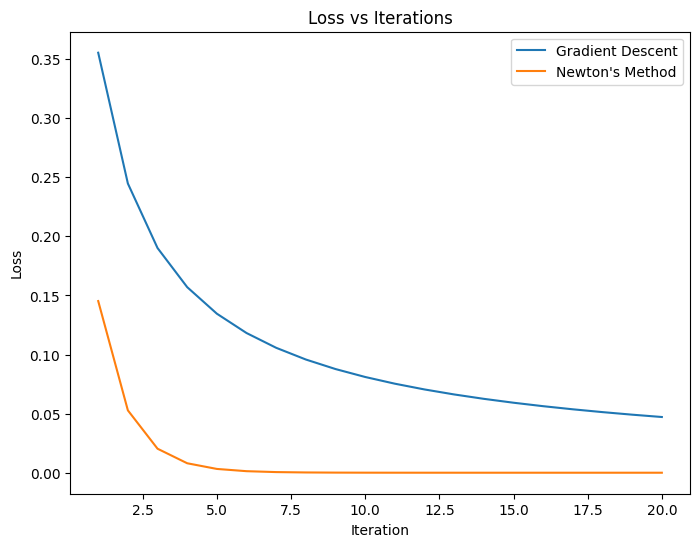

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(range(1, 21), losses_gd, label="Gradient Descent")
plt.plot(range(1, 21), losses_newton, label="Newton's Method")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iterations")
plt.legend()
plt.show()

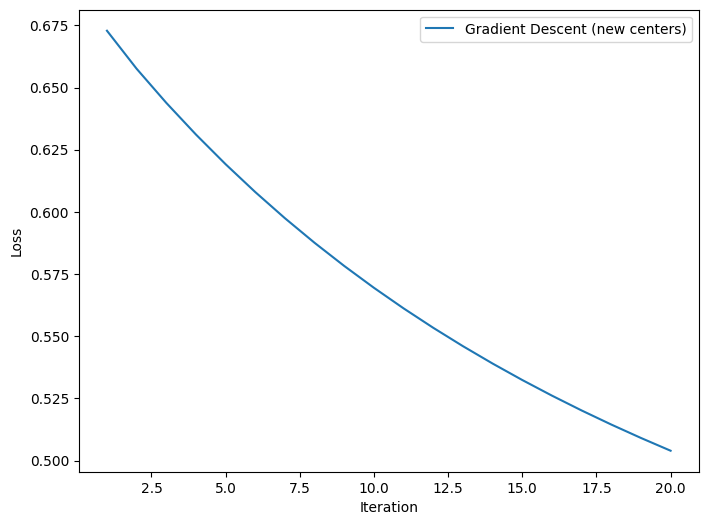

In [ ]:
# New dataset
centers_new = [[2, 2], [5, 1.5]]
X_new, y_new = make_blobs(n_samples=2000, centers=centers_new, random_state=5)
X_new = np.dot(X_new, transformation)
X_new_bias = np.c_[np.ones(X_new.shape[0]), X_new]

# Run GD again
_, losses_gd_new = gradient_descent(X_new_bias, y_new, lr=0.1, iterations=20)

plt.figure(figsize=(8,6))
plt.plot(range(1, 21), losses_gd_new, label="Gradient Descent (new centers)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()